# **Необходимые библиотеки**

In [22]:
import cv2
import numpy as np

# **Подготовка изображения к созданию модели**


In [28]:
fileStl='example.stl'
fileIm=r'12.jpg'
stl=open(fileStl, 'w')

im=cv2.imread(fileIm)
''' 
    *
    * Чтобы не было резких границ сгаживаем, а также нормируем чтобы несильно вытянутой была модель 
    *
'''
im = cv2.normalize(im, im, 0, 20, norm_type=cv2.NORM_MINMAX)
im = cv2.GaussianBlur(im,(0,0),2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

im=cv2.resize(im,(300,100))
#gray = 255-gray
#blur = cv2.resize(blur,(400,400))
#gray = cv2.normalize(gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# **Устройство STL-формата**


In [ ]:
solid name # название
facet normal 0 0 0
outer loop
vertex cd_1[0] cd_1[1] cd_1[2] # первая вершина треугольника
vertex cd_2[0] cd_2[1] cd_2[2] # вторая вершина треугольника
vertex cd_3[0] cd_3[1] cd_3[2] # третья вершина треугольника
endloop
endfacet
endsolid

# **Начинаем накладывать треугольную сетку**

По сути выдавливаем нашу модель из изображения

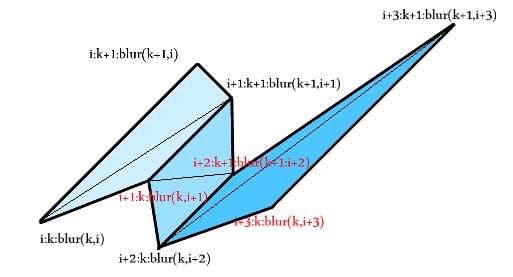

In [24]:

# Функция по созданию треугольника
def makeTriangle(cd_1, cd_2, cd_3):
    stl.write(o_1+"facet normal 0 0 0")
    stl.write(o_2 + "outer loop")
    stl.write(o_3 + "vertex " + " ".join(cd_1))
    stl.write(o_3 + "vertex " + " ".join(cd_2))
    stl.write(o_3 + "vertex " + " ".join(cd_3))
    stl.write(o_2 + "endloop \n\tendfacet")
 

In [29]:

x=0
y=0
cd_1=['0', '0', '0'] #первая вершина треульника в формате (x, y, intensity)
cd_2=['0', '0', '0'] #вторая вершина треульника в формате (x, y, intensity)
cd_3=['0', '0', '0'] #третья вершина треульника в формате (x, y, intensity)

file='STL_project-1.stl'

o_1="\n\t" 
o_2="\n\t\t"
o_3="\n\t\t\t"

stl.write("solid")

# Делаем основу модели
for i in range(im.shape[1]-1):
      cd_1=[str(i),"0","0"]
      cd_3=[str(i+1),str(im.shape[0]-1),"0"]
      cd_2=[str(i),str(im.shape[0]-1),"0"]
      makeTriangle(cd_1, cd_2, cd_3)     
for i in range(im.shape[1]-1):
      cd_1=[str(i+1),str(im.shape[0]-1),"0"]
      cd_3=[str(i),"0","0"]
      cd_2=[str(i+1),"0","0"]
      makeTriangle(cd_1, cd_2, cd_3)

# Делаем рельеф
for i in range(im.shape[1]):
        for k in range(im.shape[0]-1):
            if i!=im.shape[1]-1:
                    try:
                        
                        cd_1=[str(i),     str(k),   str(im[k, i])   ]
                        cd_2=[str(i + 1), str(k),   str(im[k, i+1]) ]
                        cd_3=[str(i+1),   str(k+1), str(im[k+1,i+1])] 
                     
                    except:
                        print('er')
                    makeTriangle(cd_1, cd_2, cd_3)
                    try:
                        cd_1=[str(i),  str(k),   str(im[k, i])    ]
                        cd_2=[str(i+1),str(k+1), str(im[k+1, i+1])]
                        cd_3=[str(i),  str(k+1), str(im[k+1,i])   ]   
                    except:
                        print('er')
                    makeTriangle(cd_1, cd_2, cd_3)

print('Done!')

Done!
